In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing 

<AxesSubplot:>

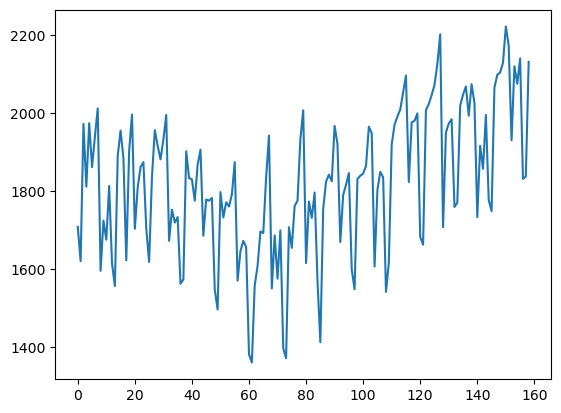

In [2]:
Walmart = pd.read_csv("footfalls.csv")
Walmart.Footfalls.plot()

# Splitting data

In [3]:
Train = Walmart.head(147)
Test = Walmart.tail(12)
Train

,Month,Footfalls,t,log_footfalls,t_square,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,Jan-91,1709,1,7.443664,1,1,0,0,0,0,0,0,0,0,0,0,0
1,Feb-91,1621,2,7.390799,4,0,1,0,0,0,0,0,0,0,0,0,0
2,Mar-91,1973,3,7.587311,9,0,0,1,0,0,0,0,0,0,0,0,0
3,Apr-91,1812,4,7.502186,16,0,0,0,1,0,0,0,0,0,0,0,0
4,May-91,1975,5,7.588324,25,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,Nov-02,1858,143,7.527256,20449,0,0,0,0,0,0,0,0,0,0,1,0
143,Dec-02,1996,144,7.598900,20736,0,0,0,0,0,0,0,0,0,0,0,1
144,Jan-03,1778,145,7.483244,21025,1,0,0,0,0,0,0,0,0,0,0,0
145,Feb-03,1749,146,7.466799,21316,0,1,0,0,0,0,0,0,0,0,0,0


In [4]:
Test

,Month,Footfalls,t,log_footfalls,t_square,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
147,Apr-03,2099,148,7.649216,21904,0,0,0,1,0,0,0,0,0,0,0,0
148,May-03,2105,149,7.652071,22201,0,0,0,0,1,0,0,0,0,0,0,0
149,Jun-03,2130,150,7.663877,22500,0,0,0,0,0,1,0,0,0,0,0,0
150,Jul-03,2223,151,7.706613,22801,0,0,0,0,0,0,1,0,0,0,0,0
151,Aug-03,2174,152,7.684324,23104,0,0,0,0,0,0,0,1,0,0,0,0
152,Sep-03,1931,153,7.565793,23409,0,0,0,0,0,0,0,0,1,0,0,0
153,Oct-03,2121,154,7.659643,23716,0,0,0,0,0,0,0,0,0,1,0,0
154,Nov-03,2076,155,7.638198,24025,0,0,0,0,0,0,0,0,0,0,1,0
155,Dec-03,2141,156,7.669028,24336,0,0,0,0,0,0,0,0,0,0,0,1
156,Jan-04,1832,157,7.513164,24649,1,0,0,0,0,0,0,0,0,0,0,0


# Moving Average 

<AxesSubplot:>

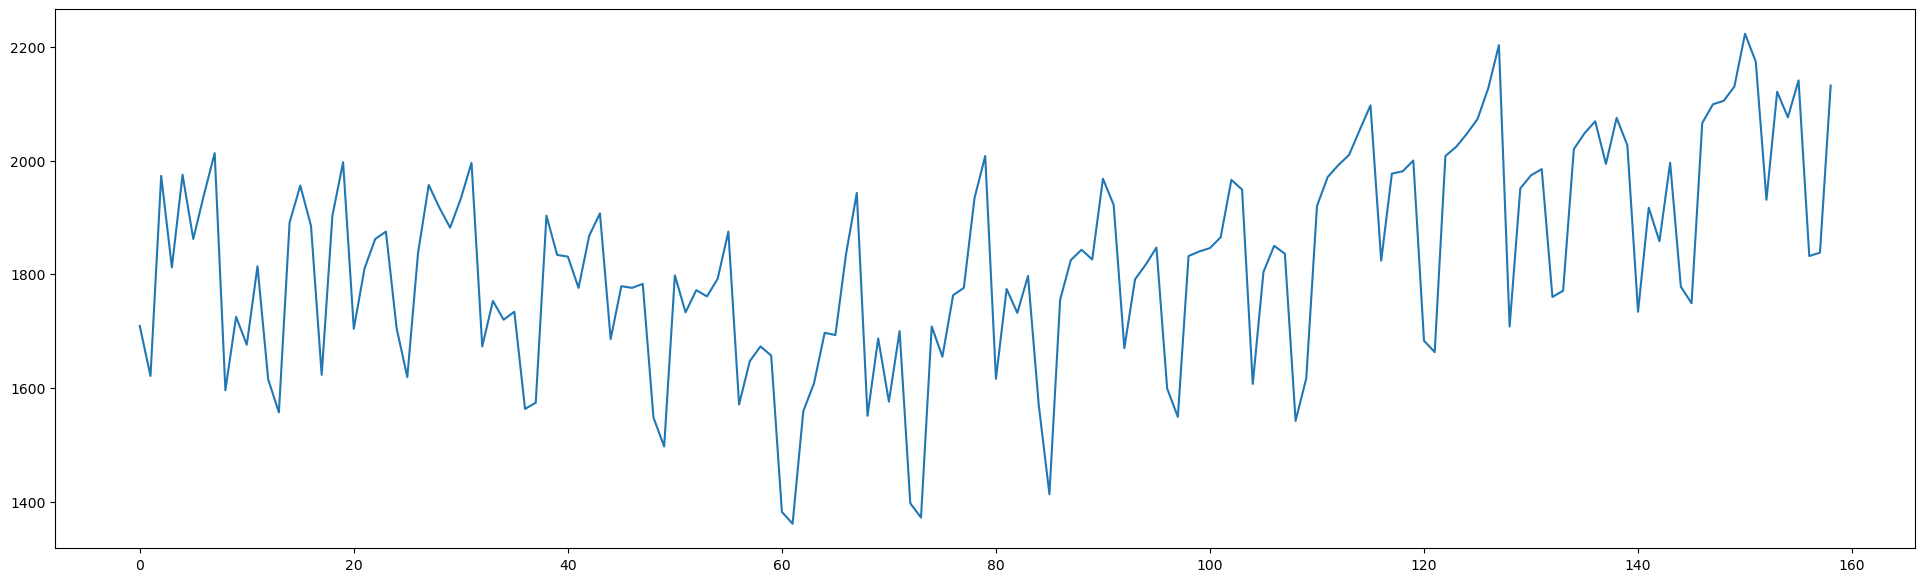

In [5]:
plt.figure(figsize=(24,7))
Walmart.Footfalls.plot()

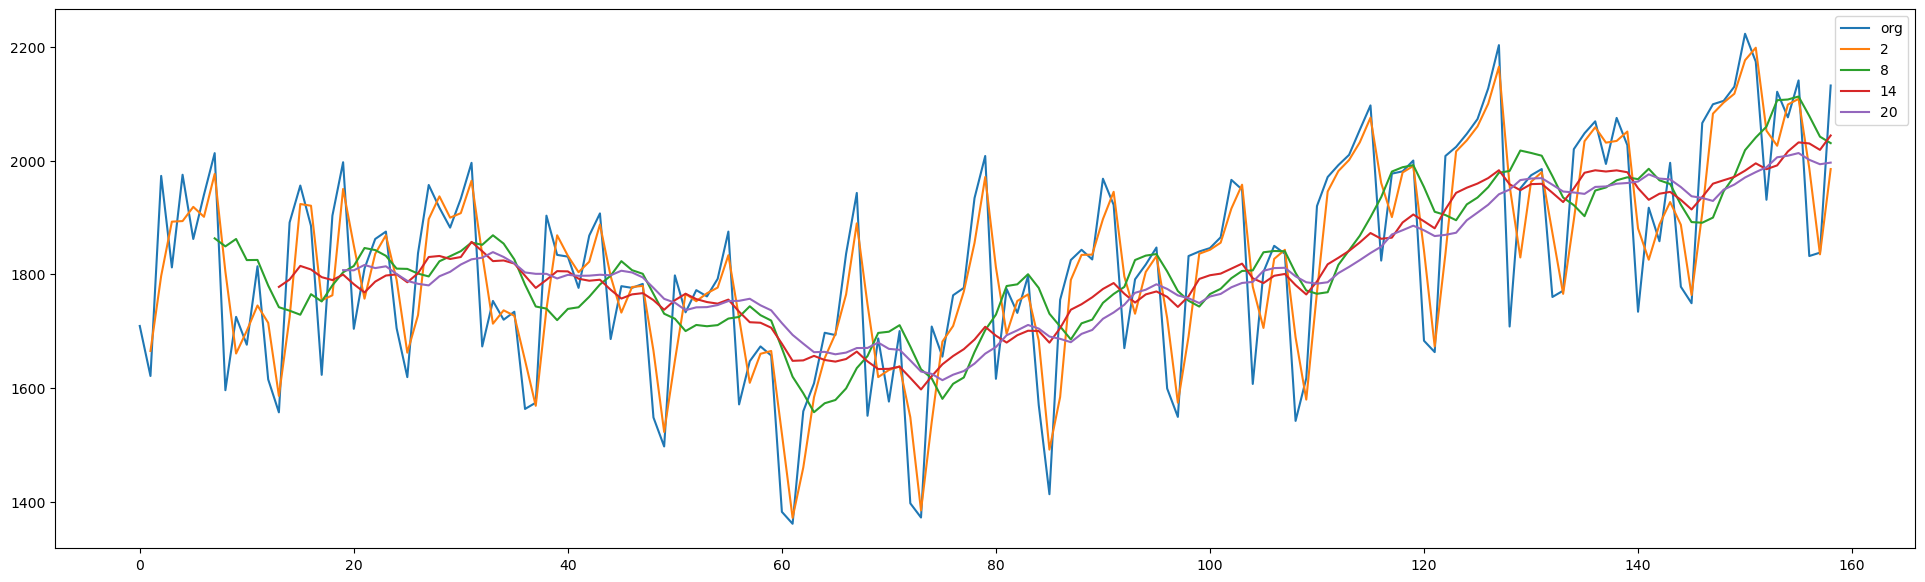

In [4]:
plt.figure(figsize=(24,7))
Walmart.Footfalls.plot(label="org")
for i in range(2,24,6):
    #plt.figure(figsize=(24,7))
    Walmart["Footfalls"].rolling(i).mean().plot(label=str(i))
    #plt.title("MA"+str(i))
plt.legend(loc='best')

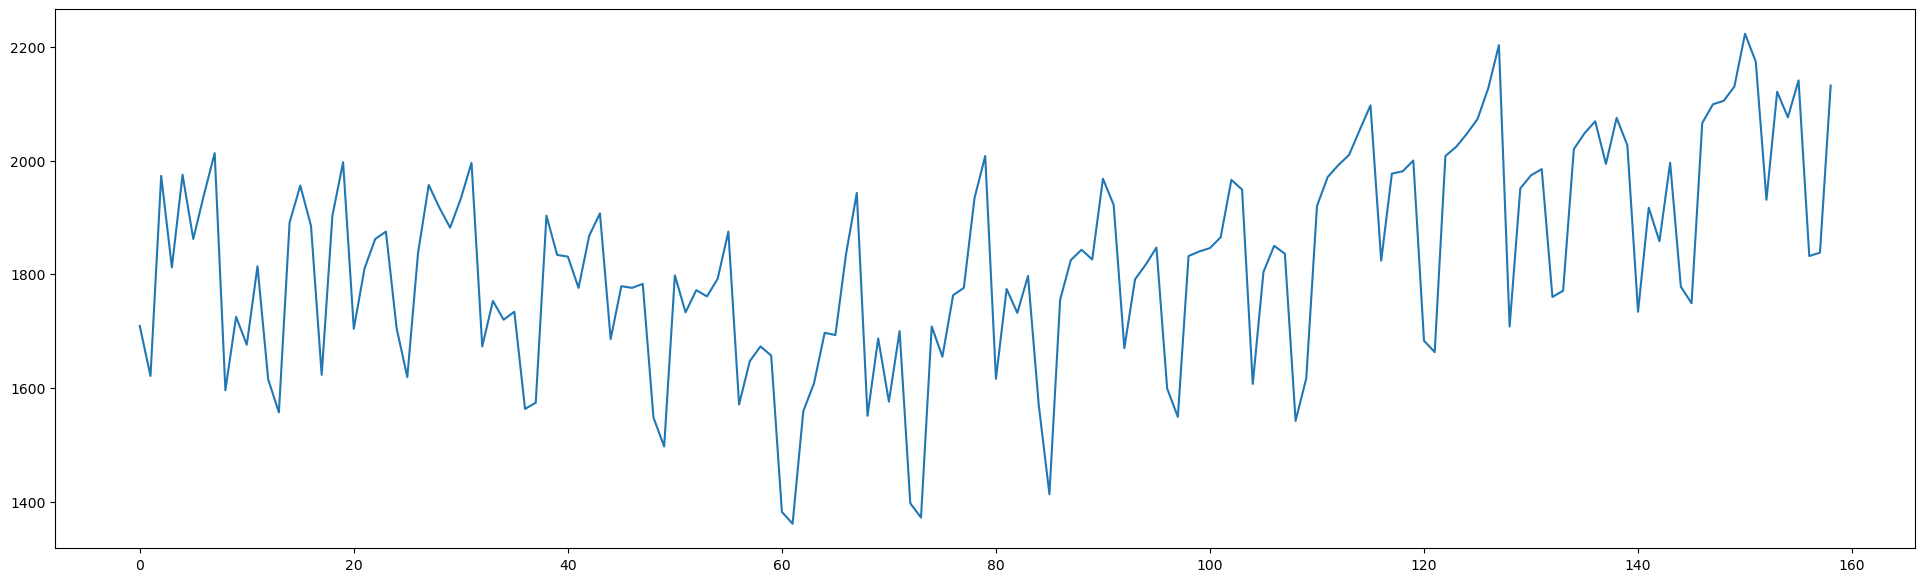

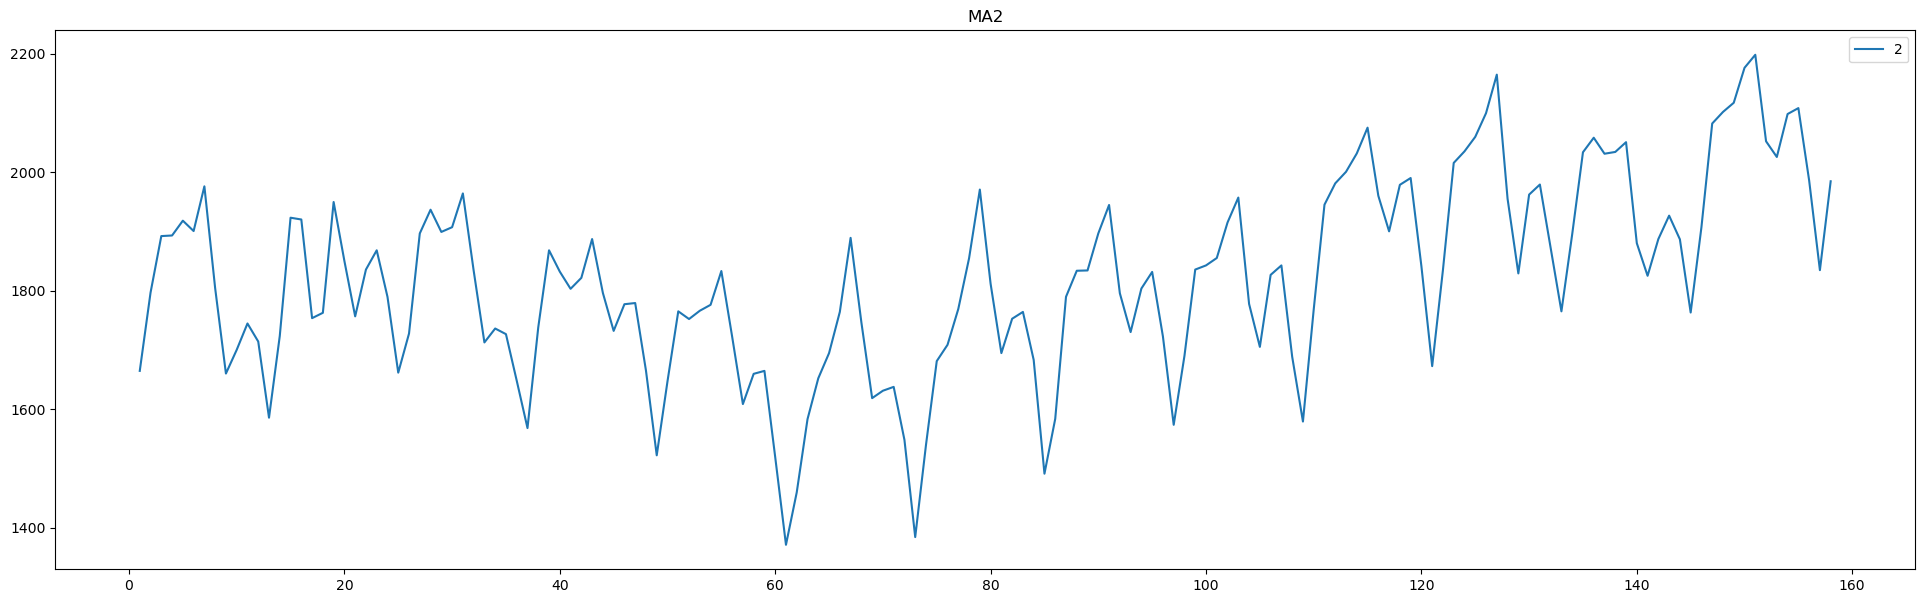

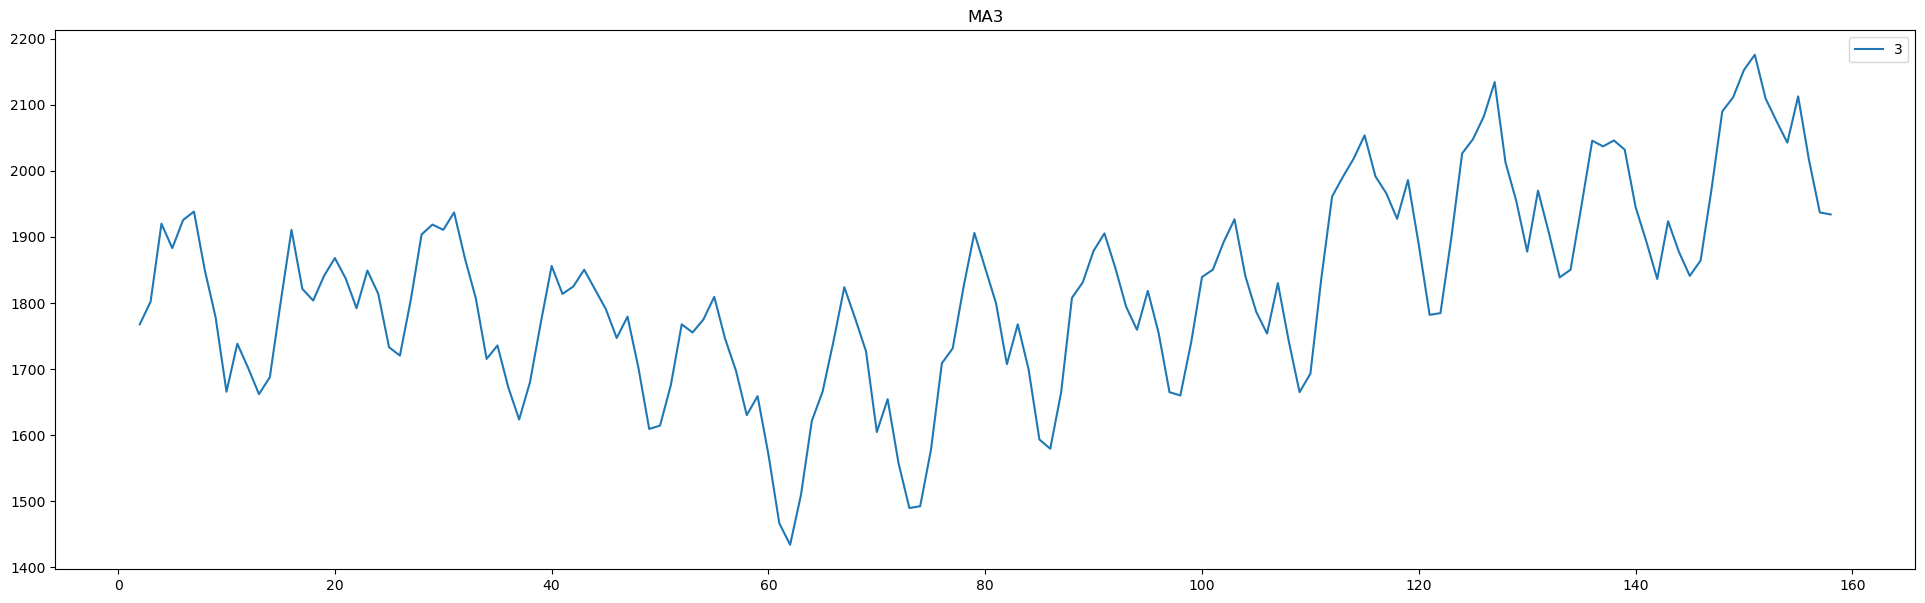

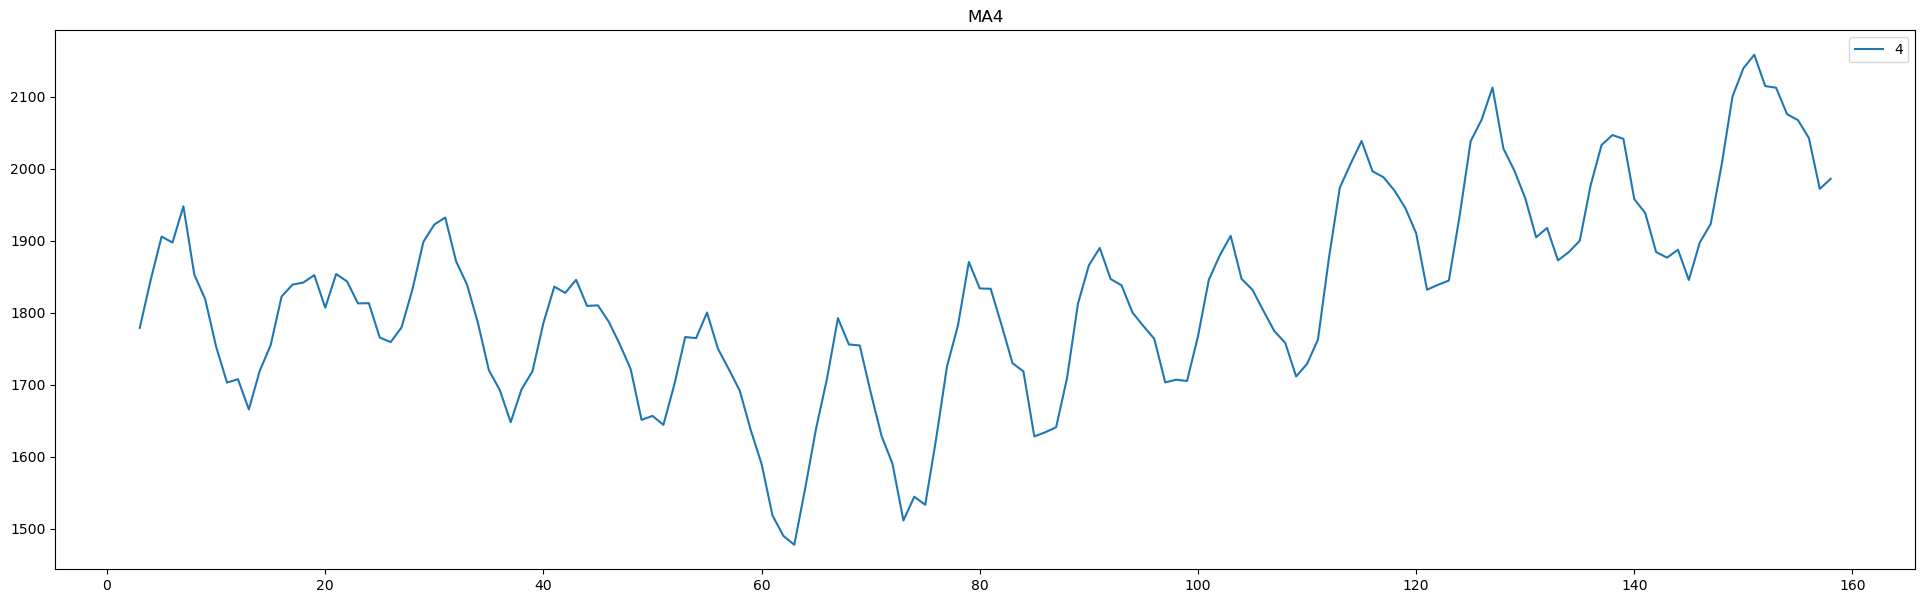

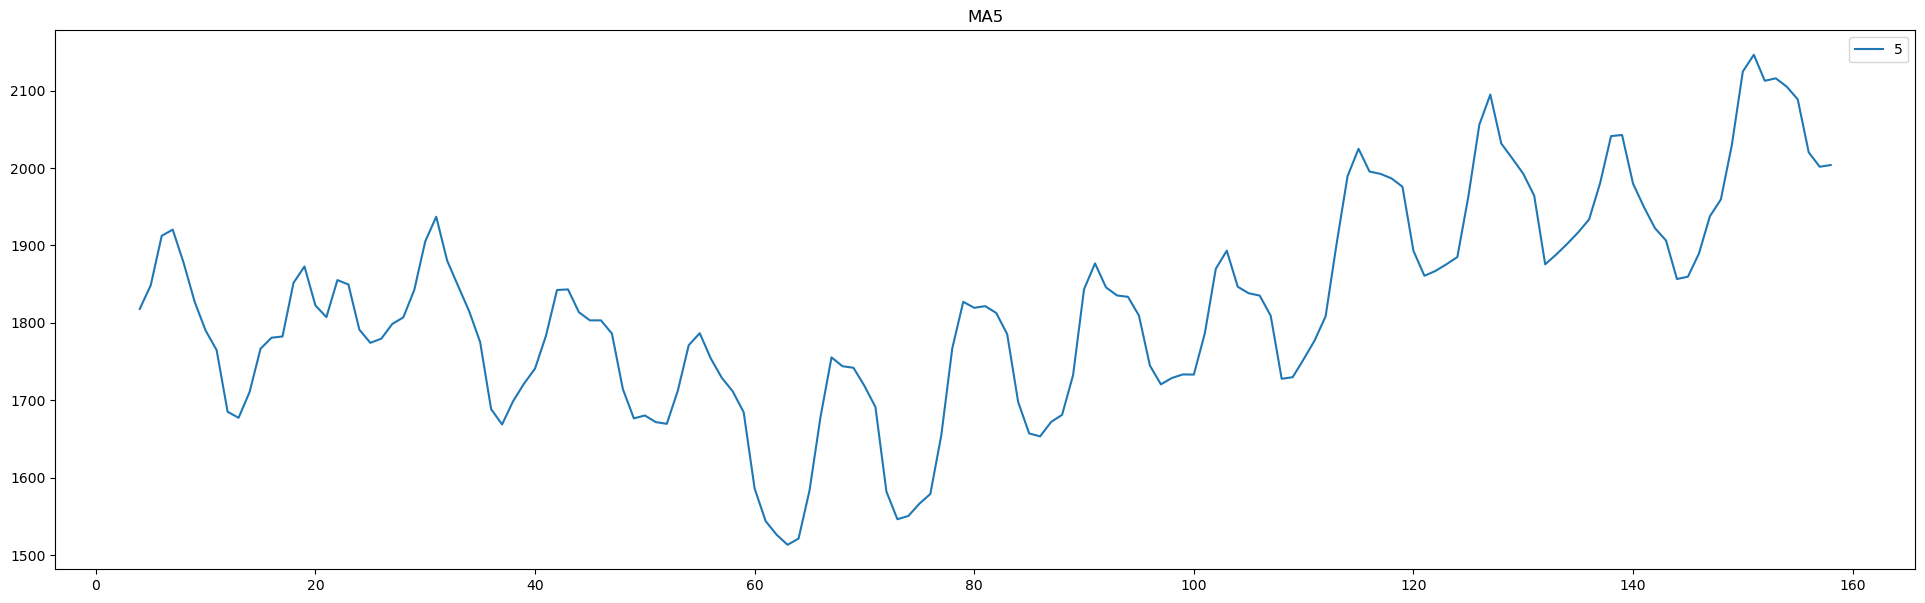

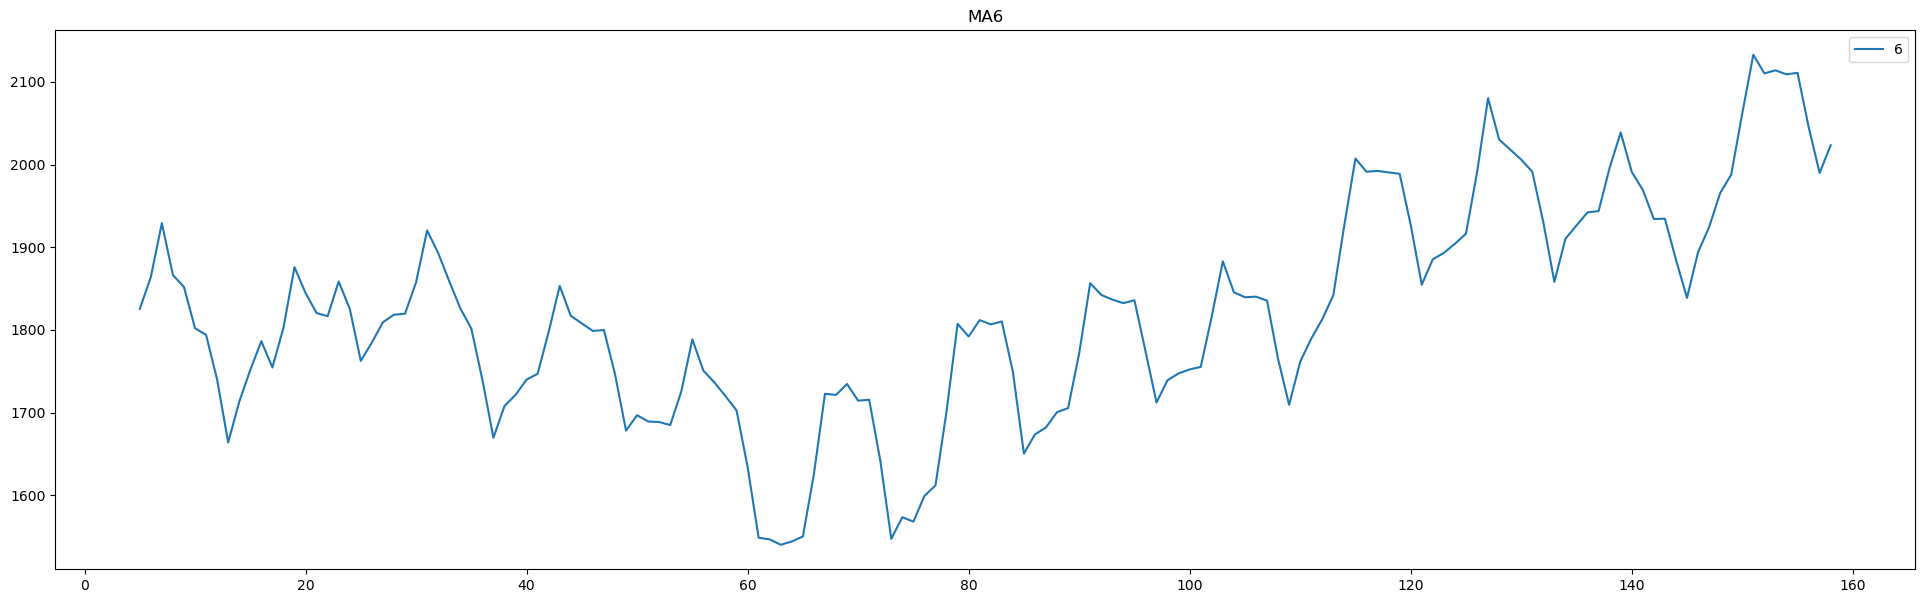

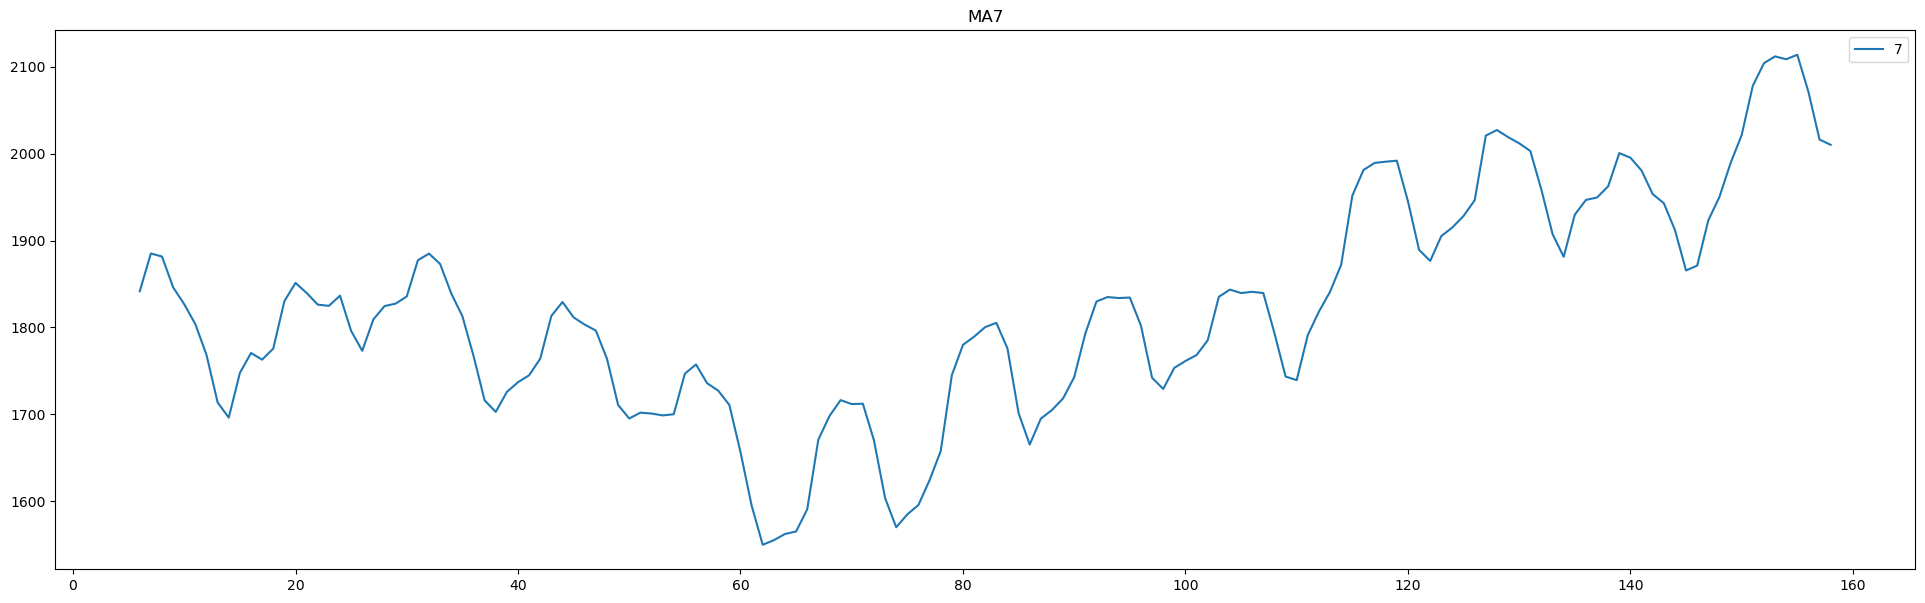

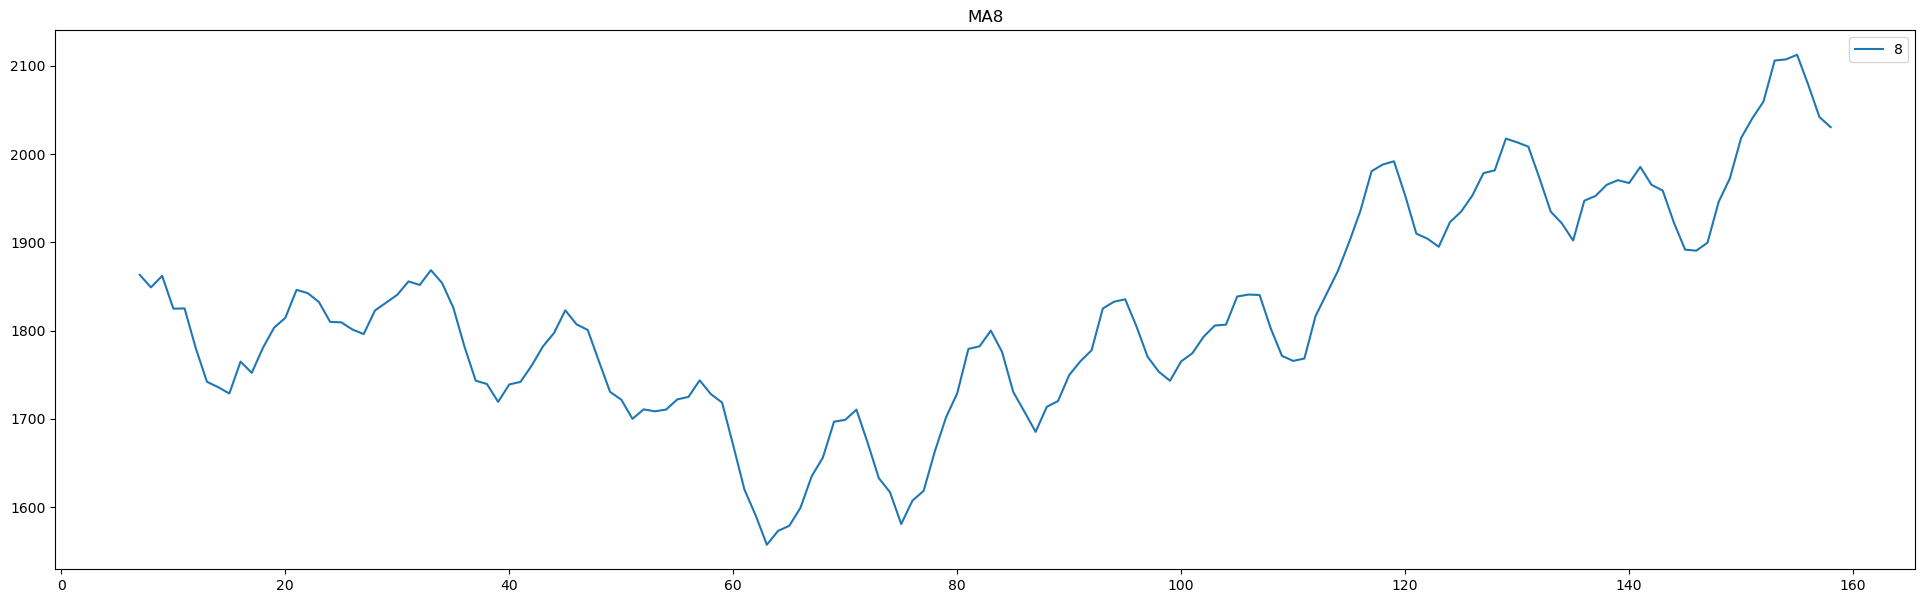

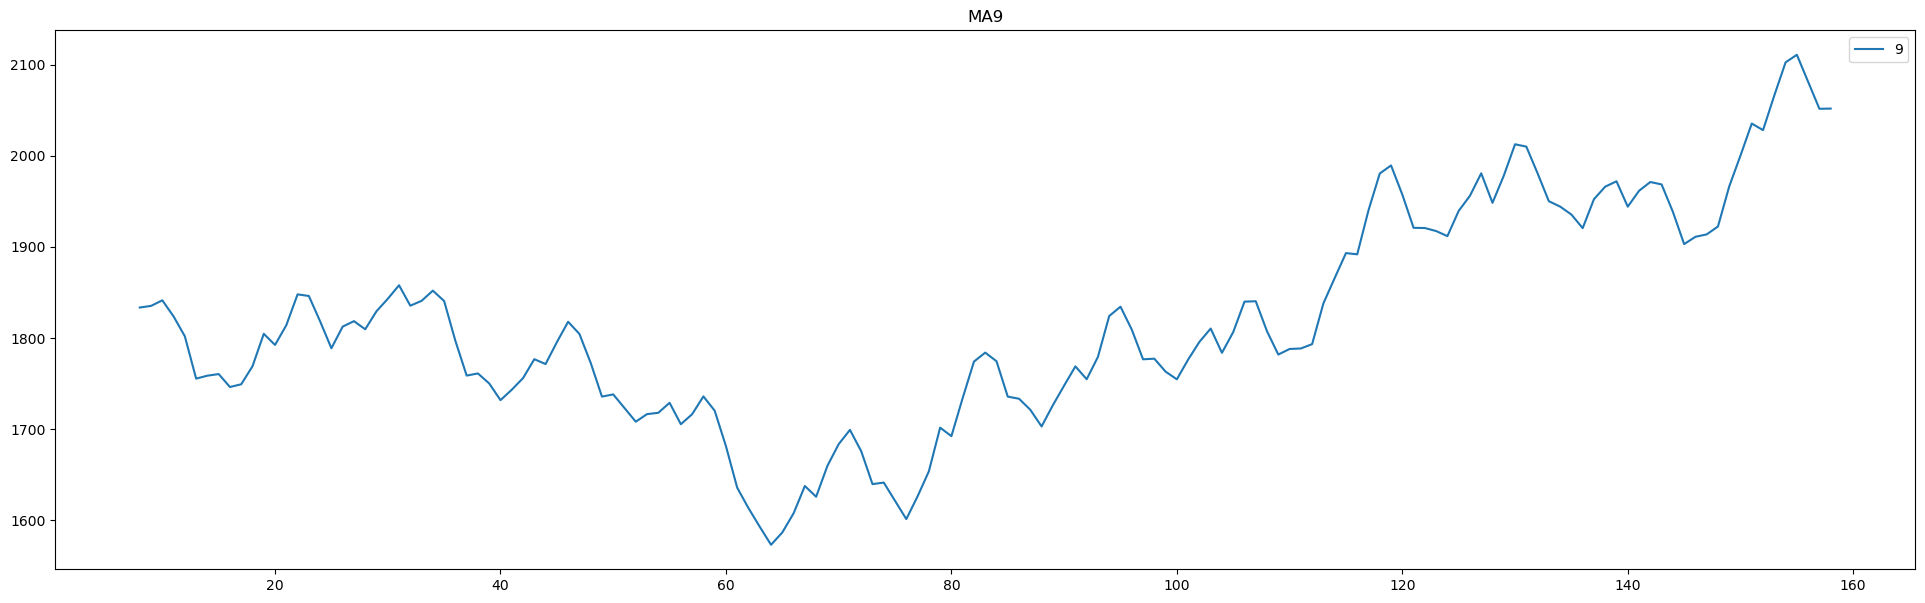

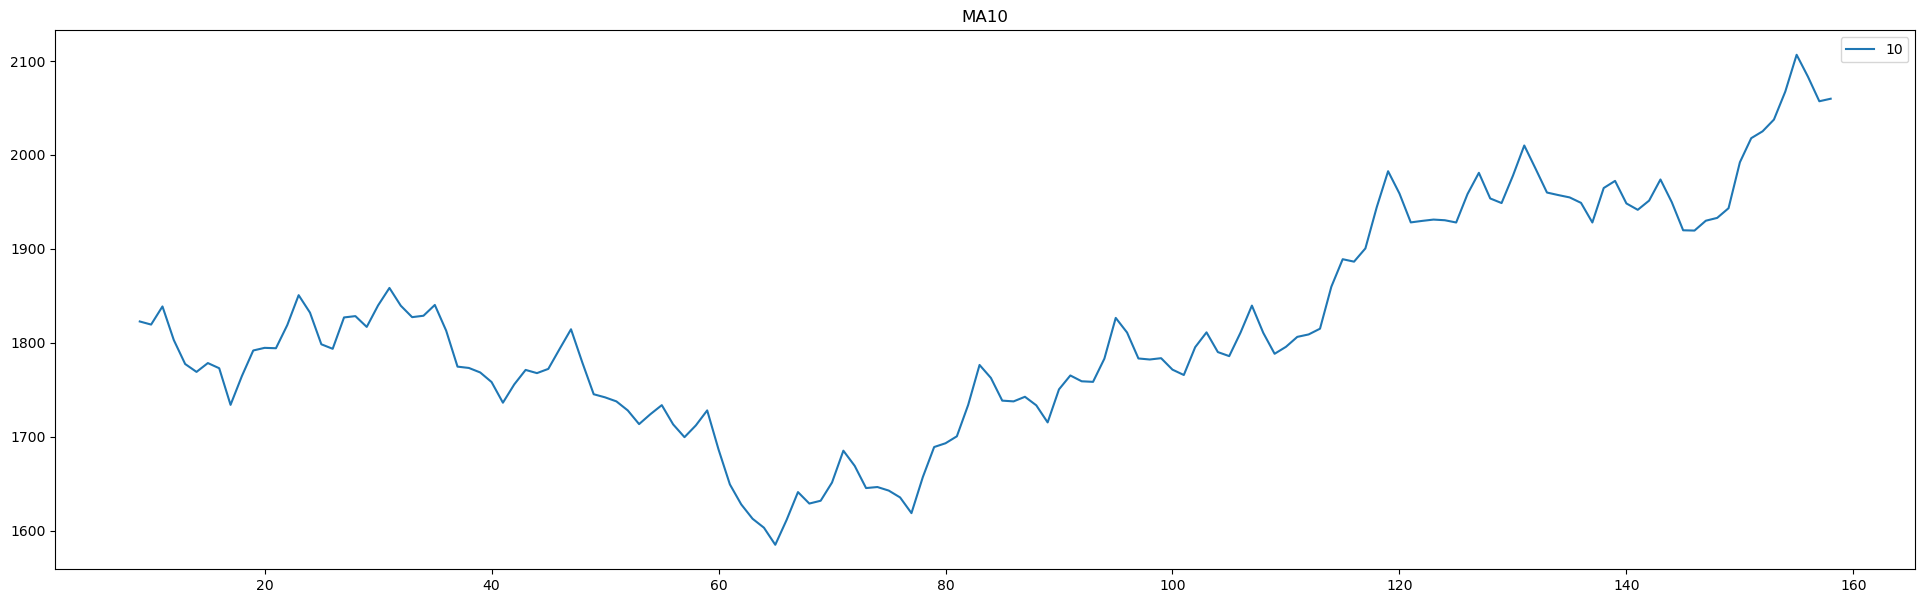

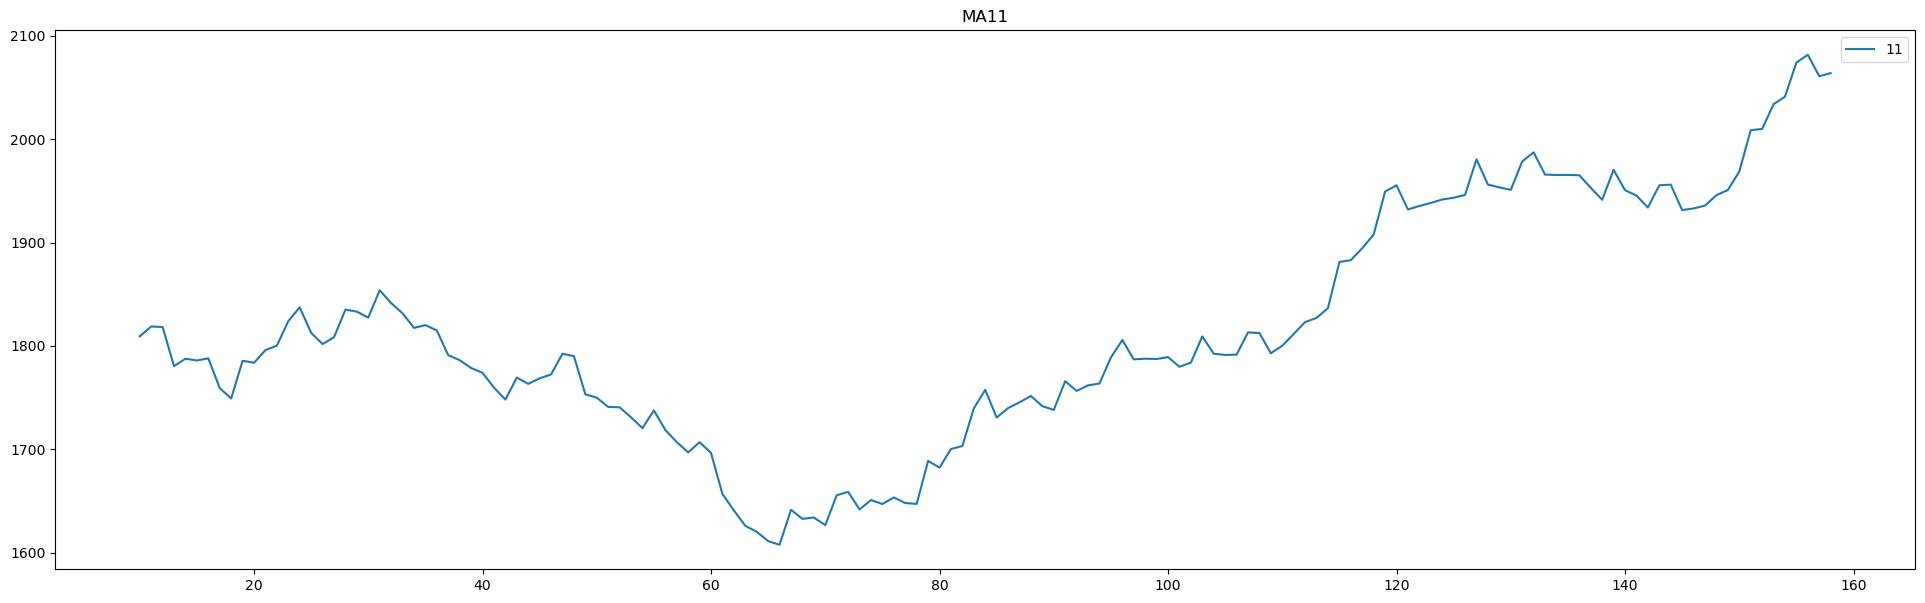

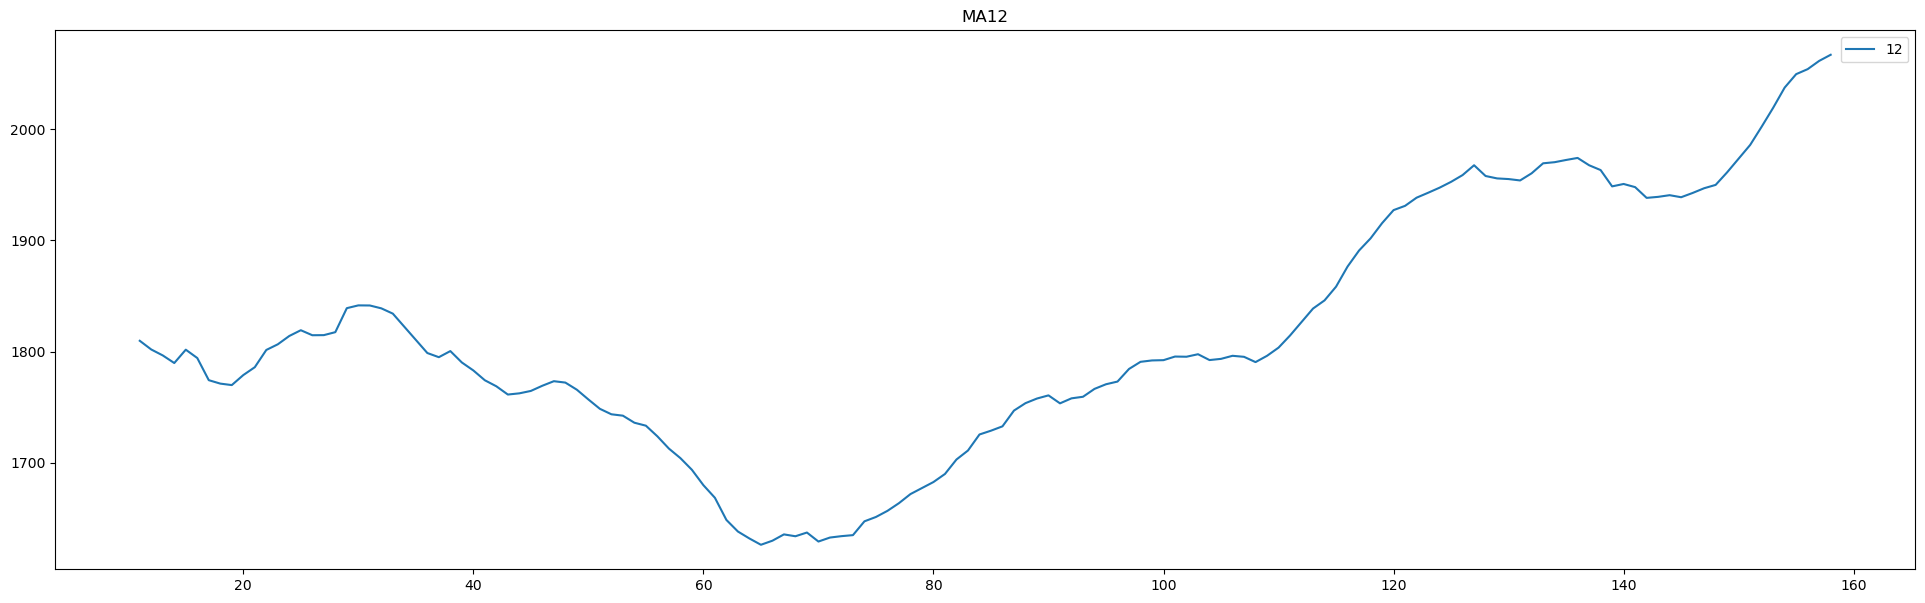

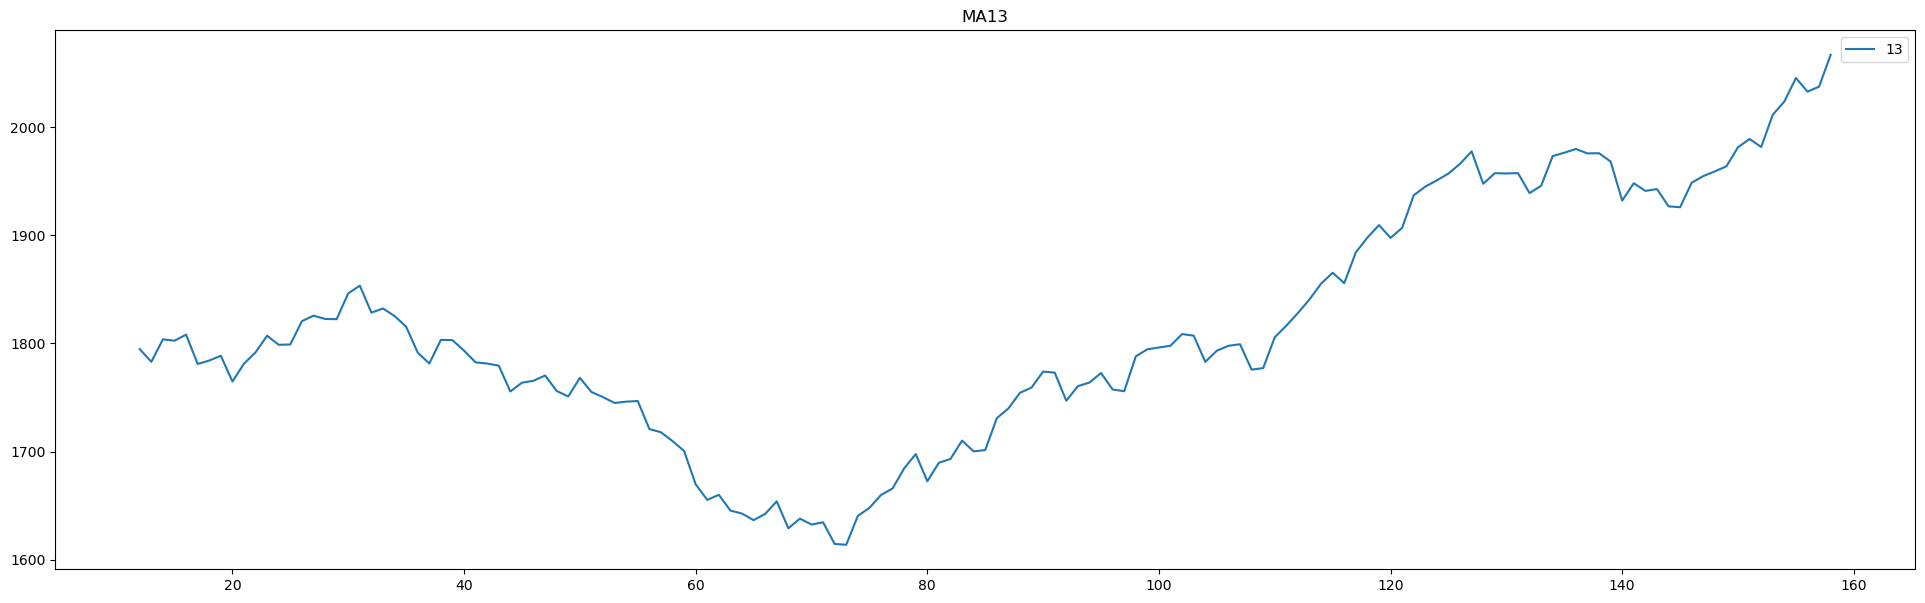

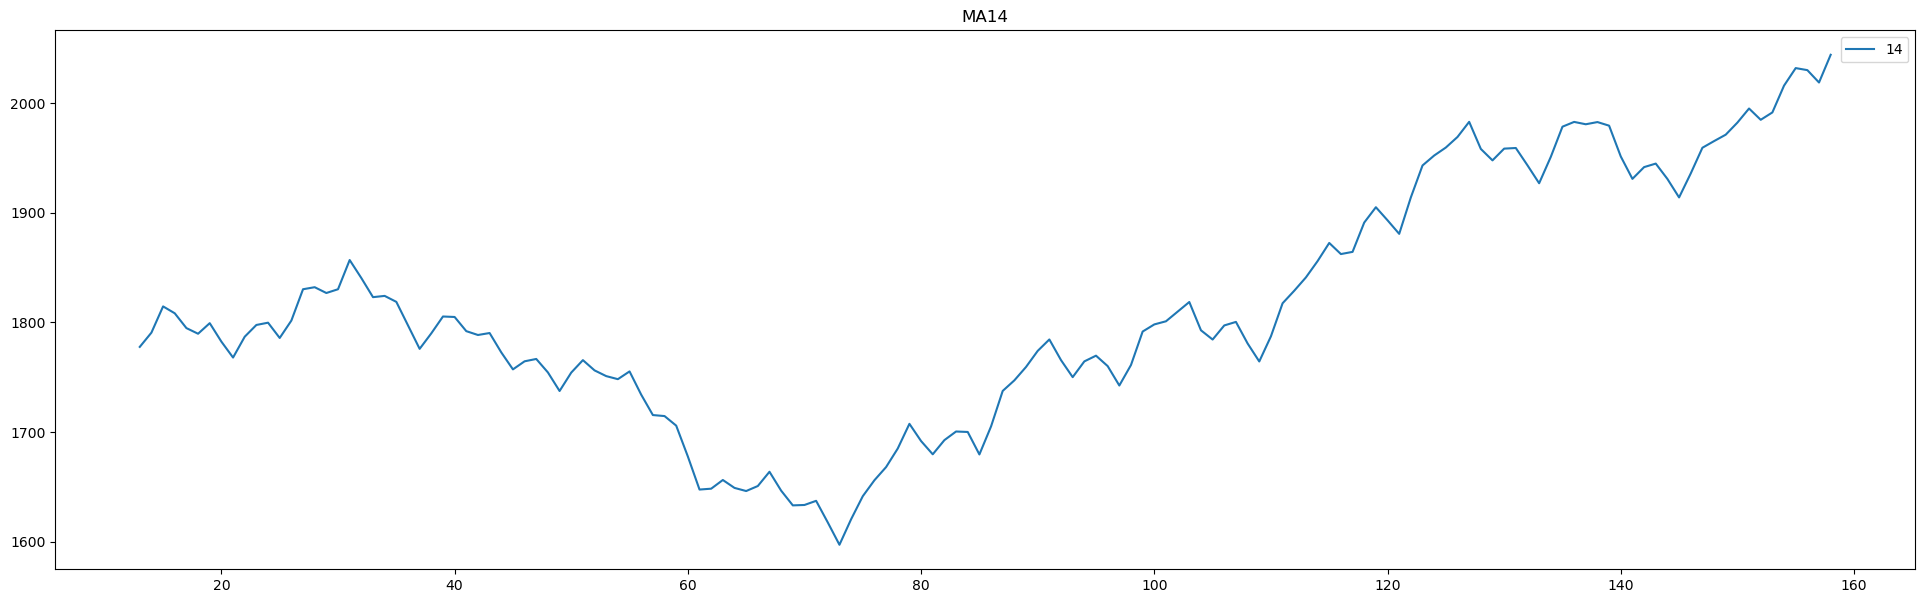

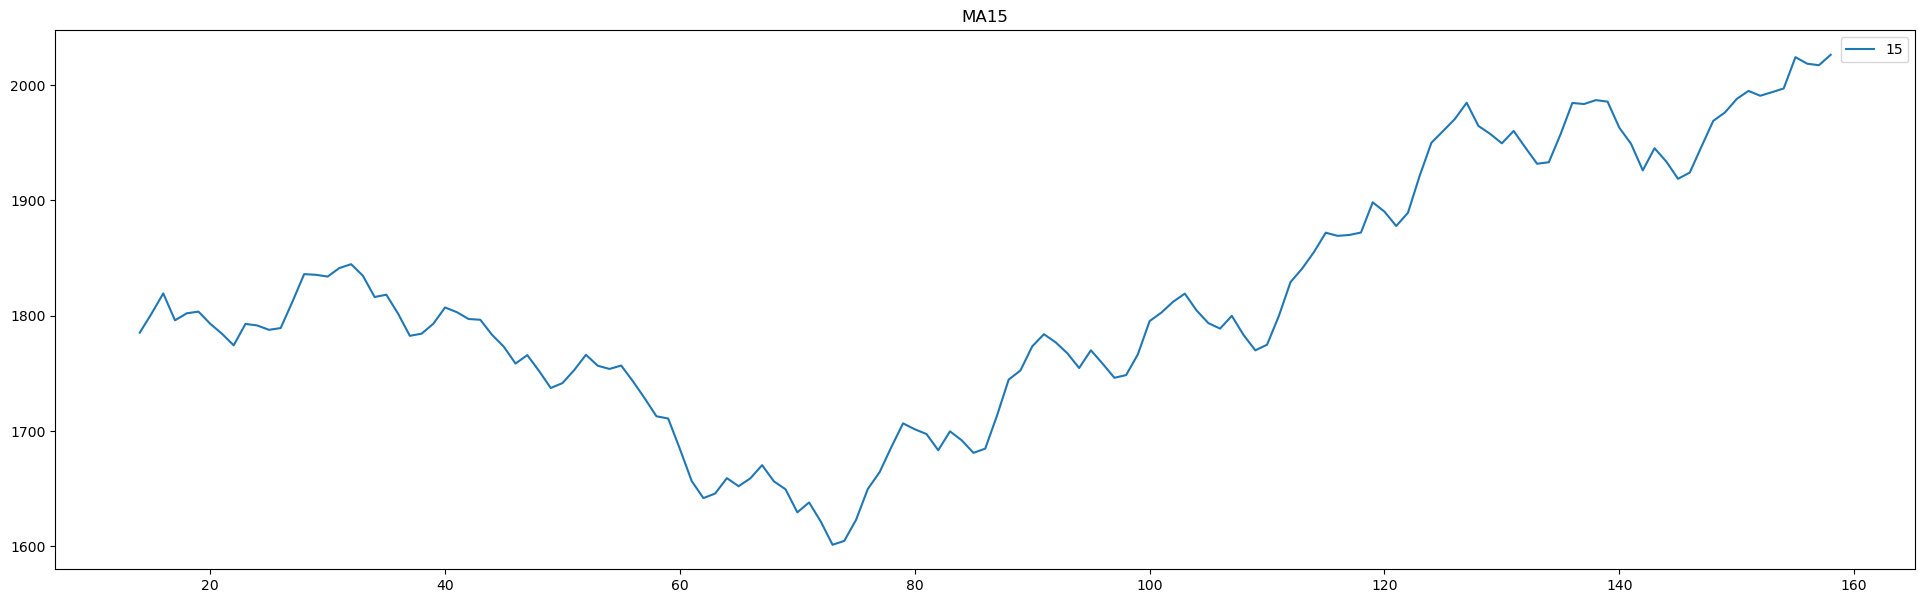

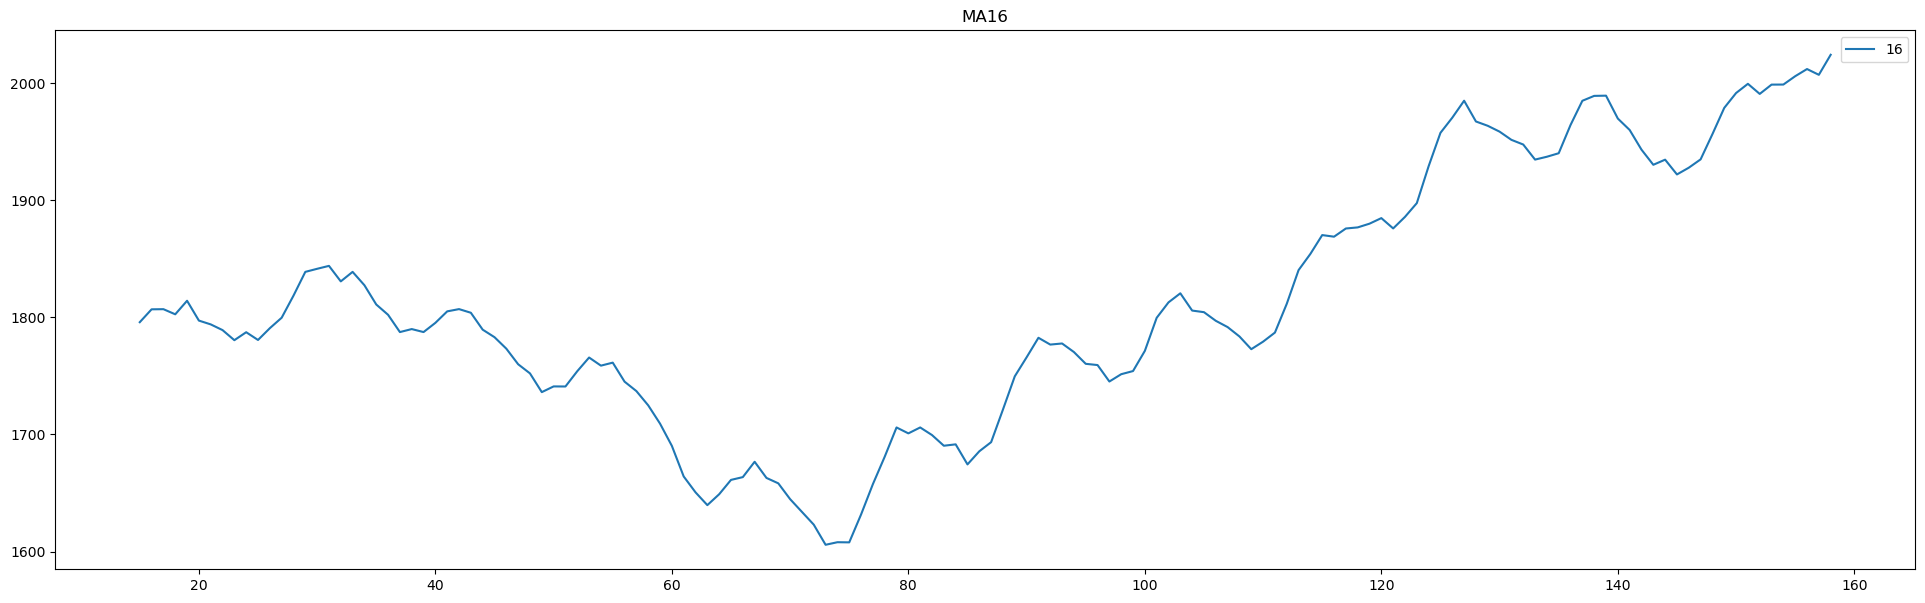

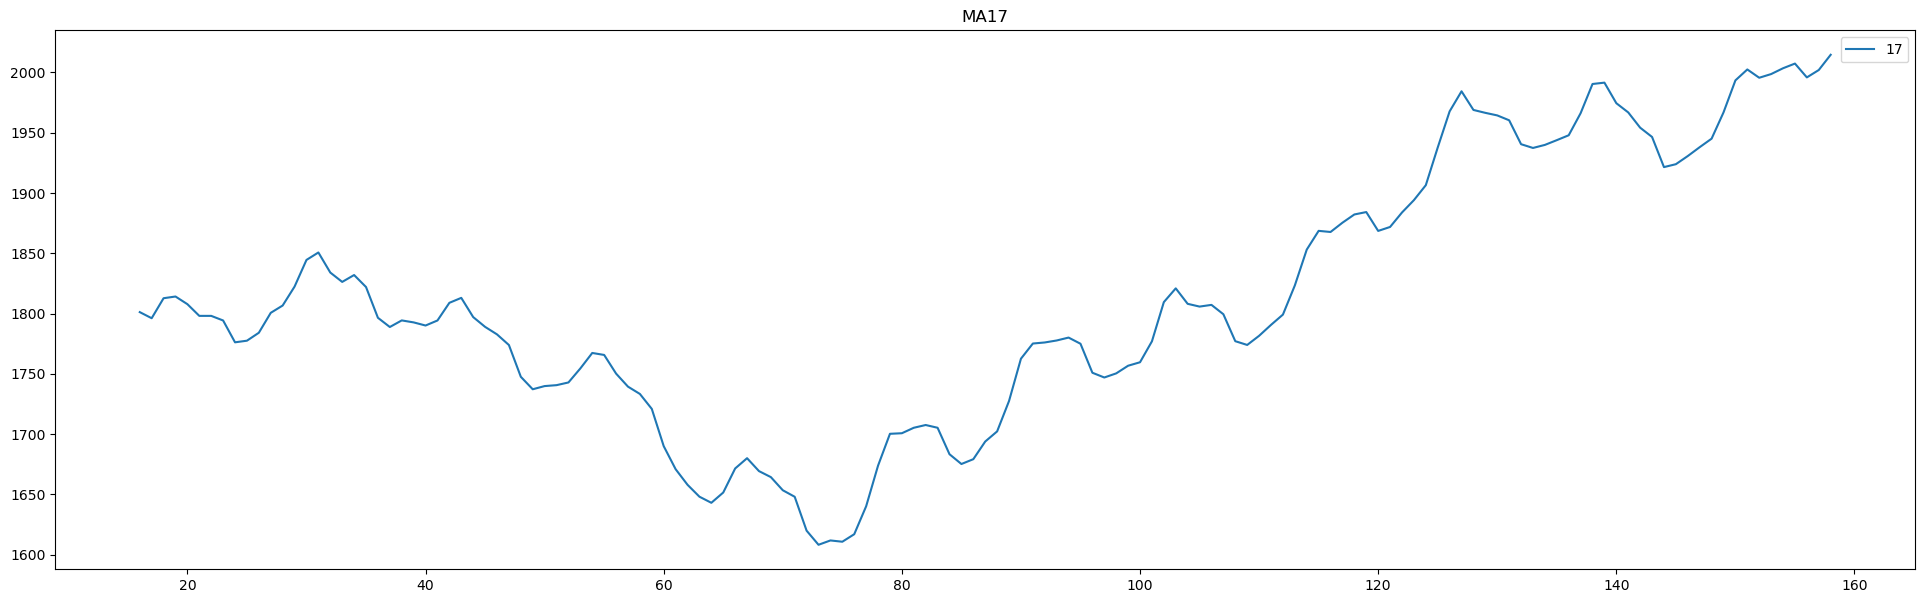

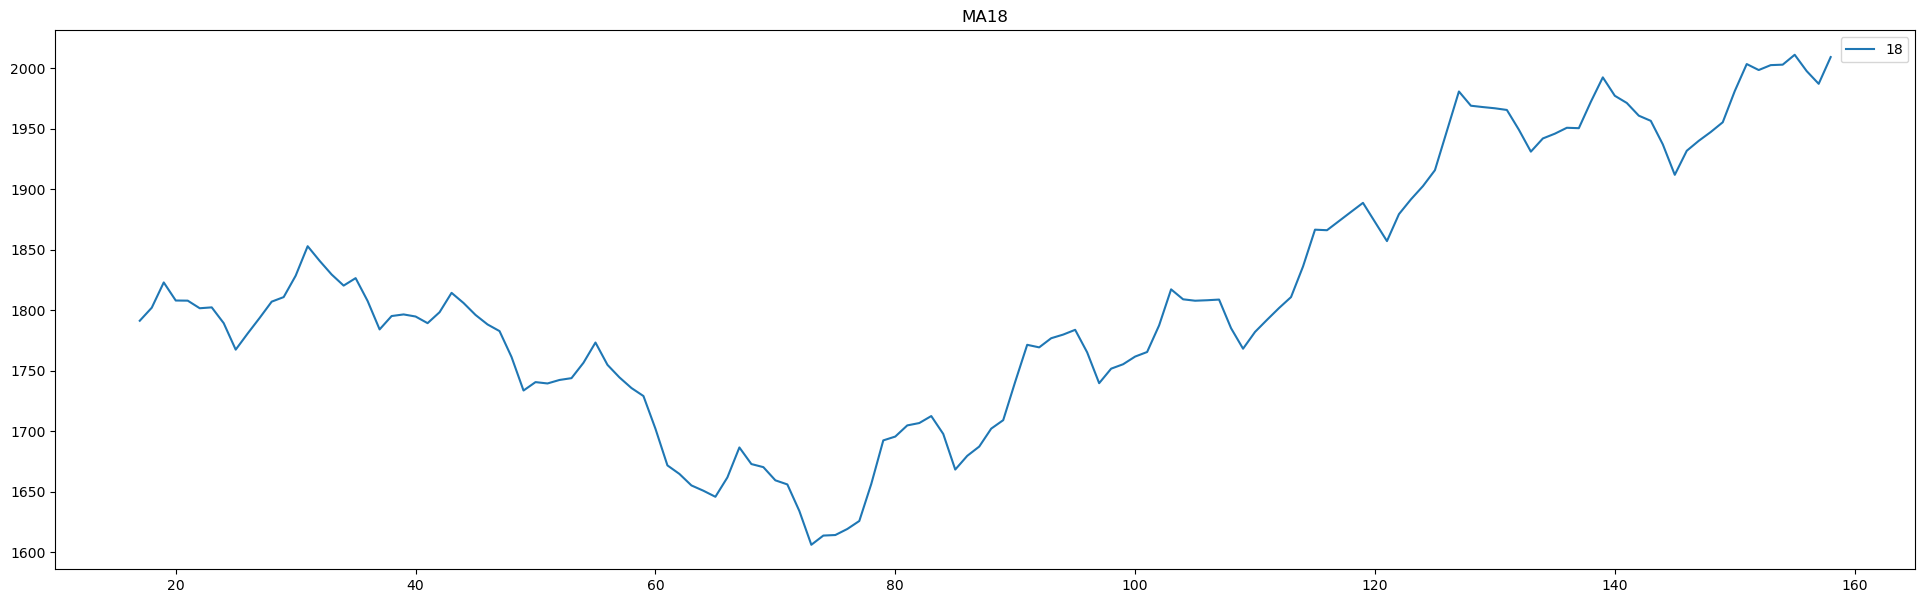

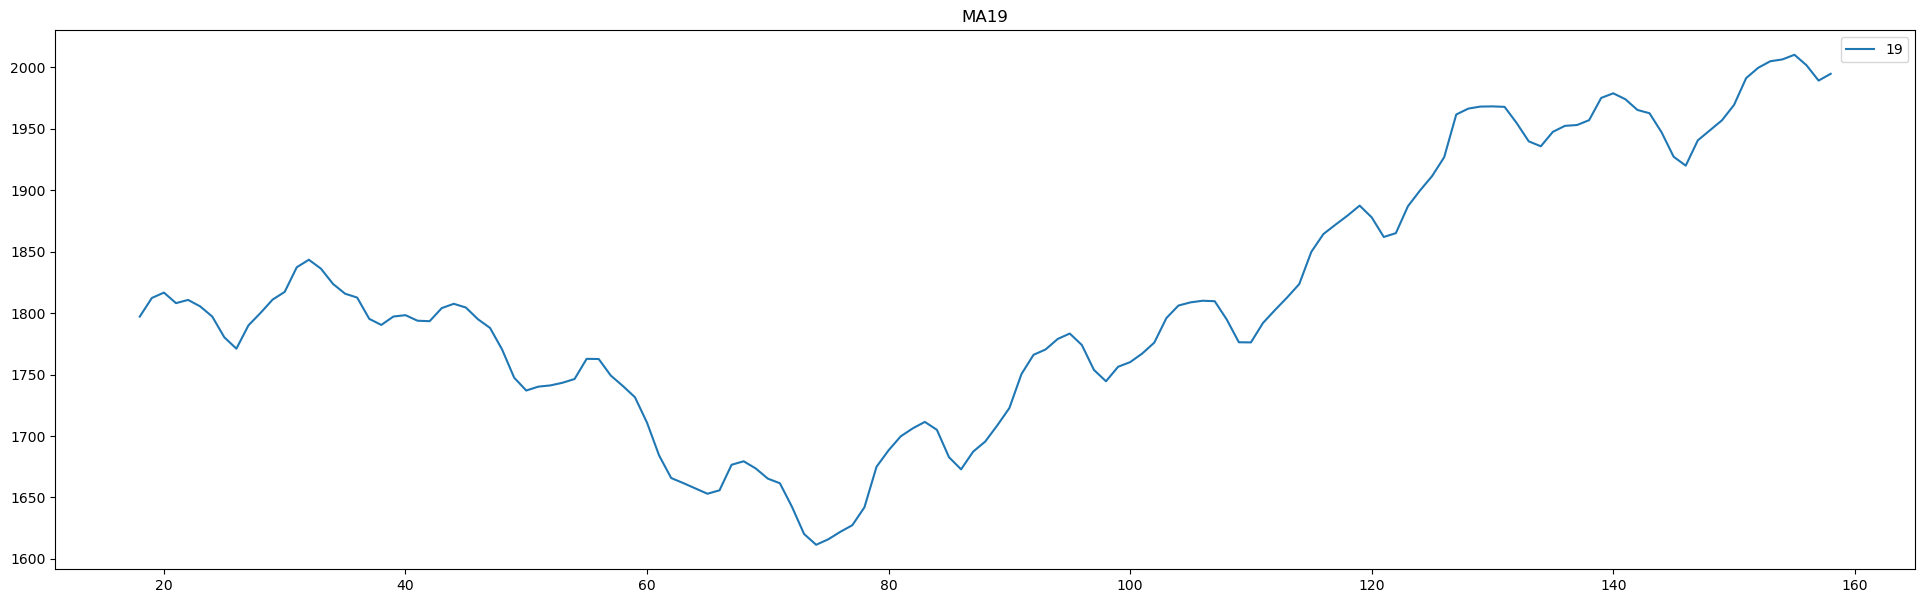

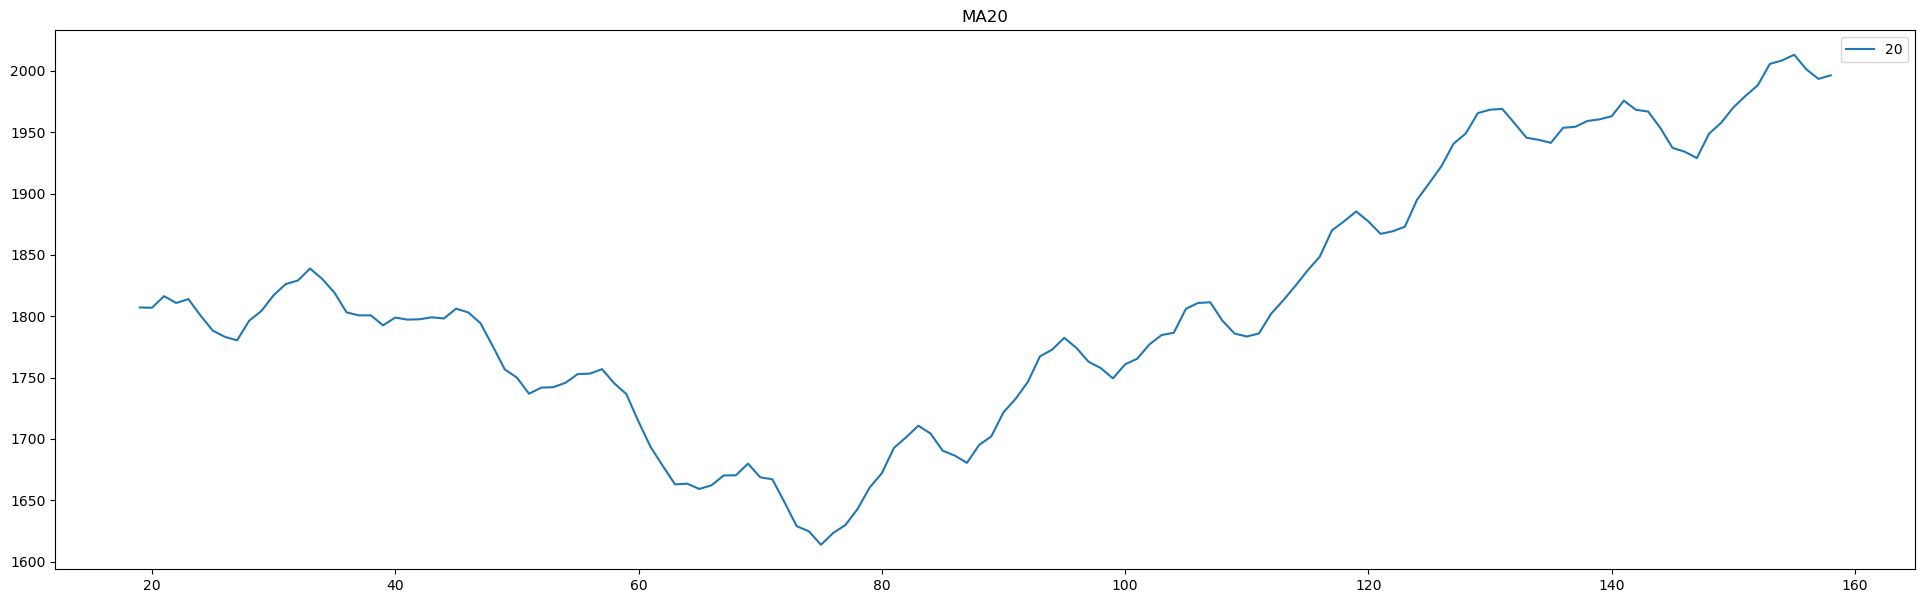

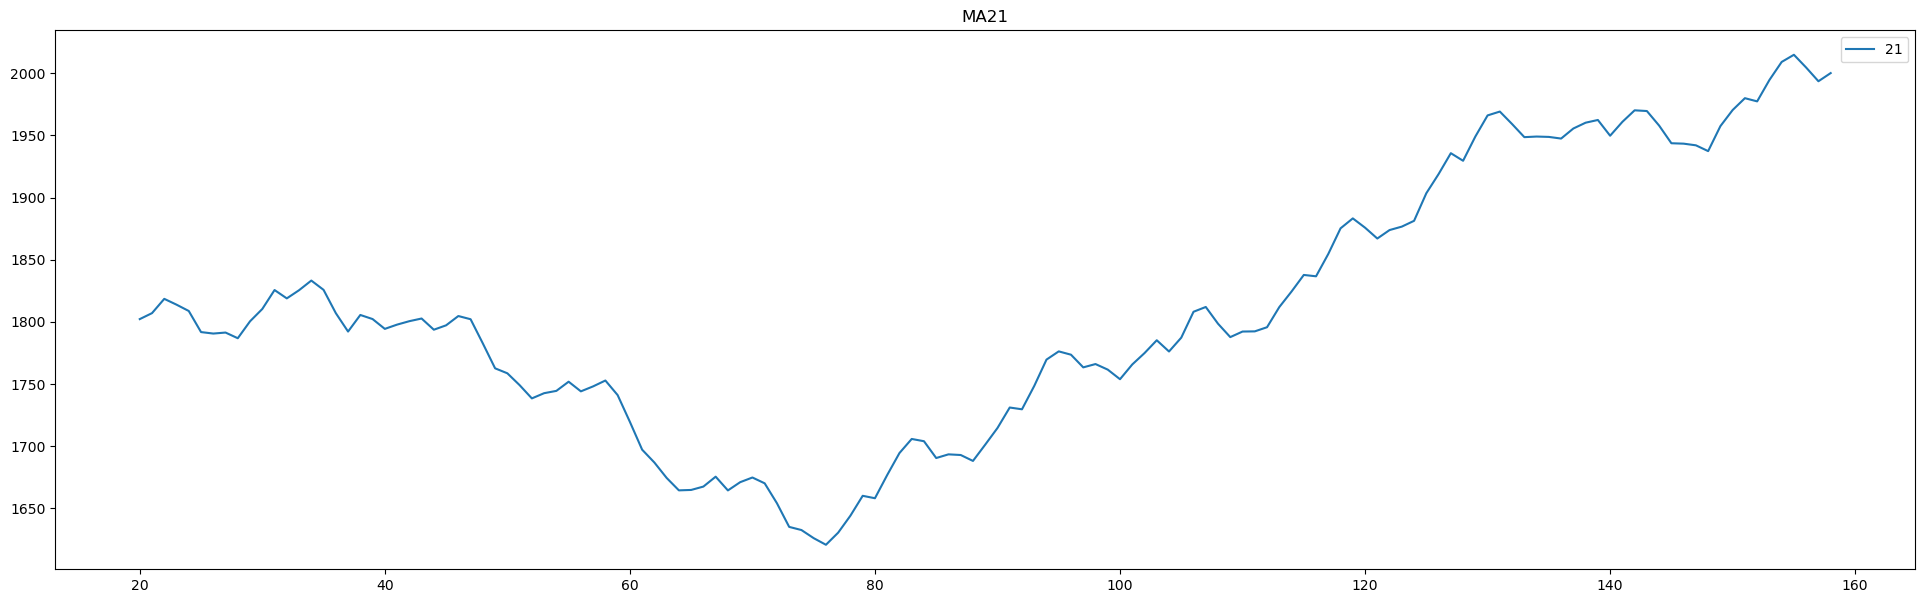

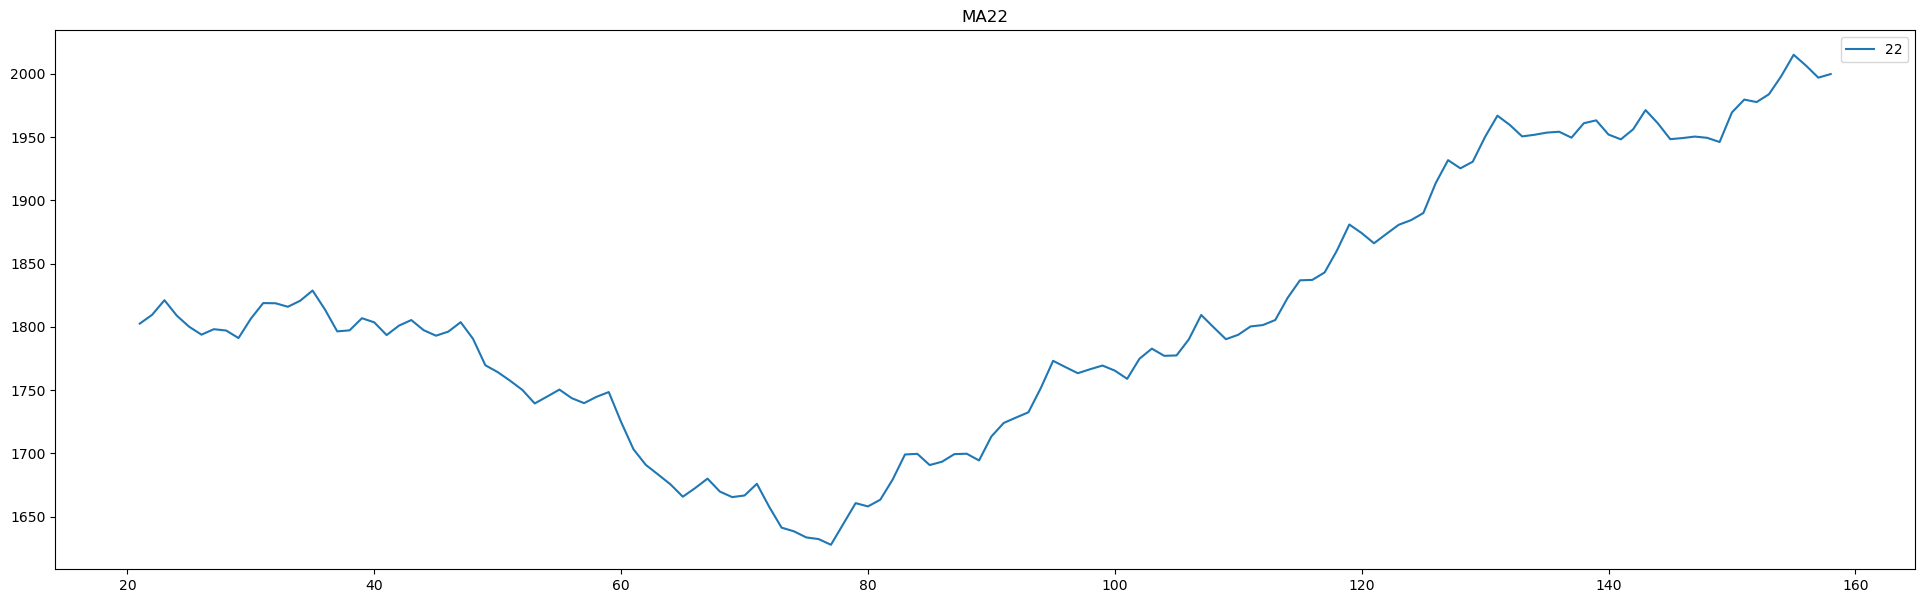

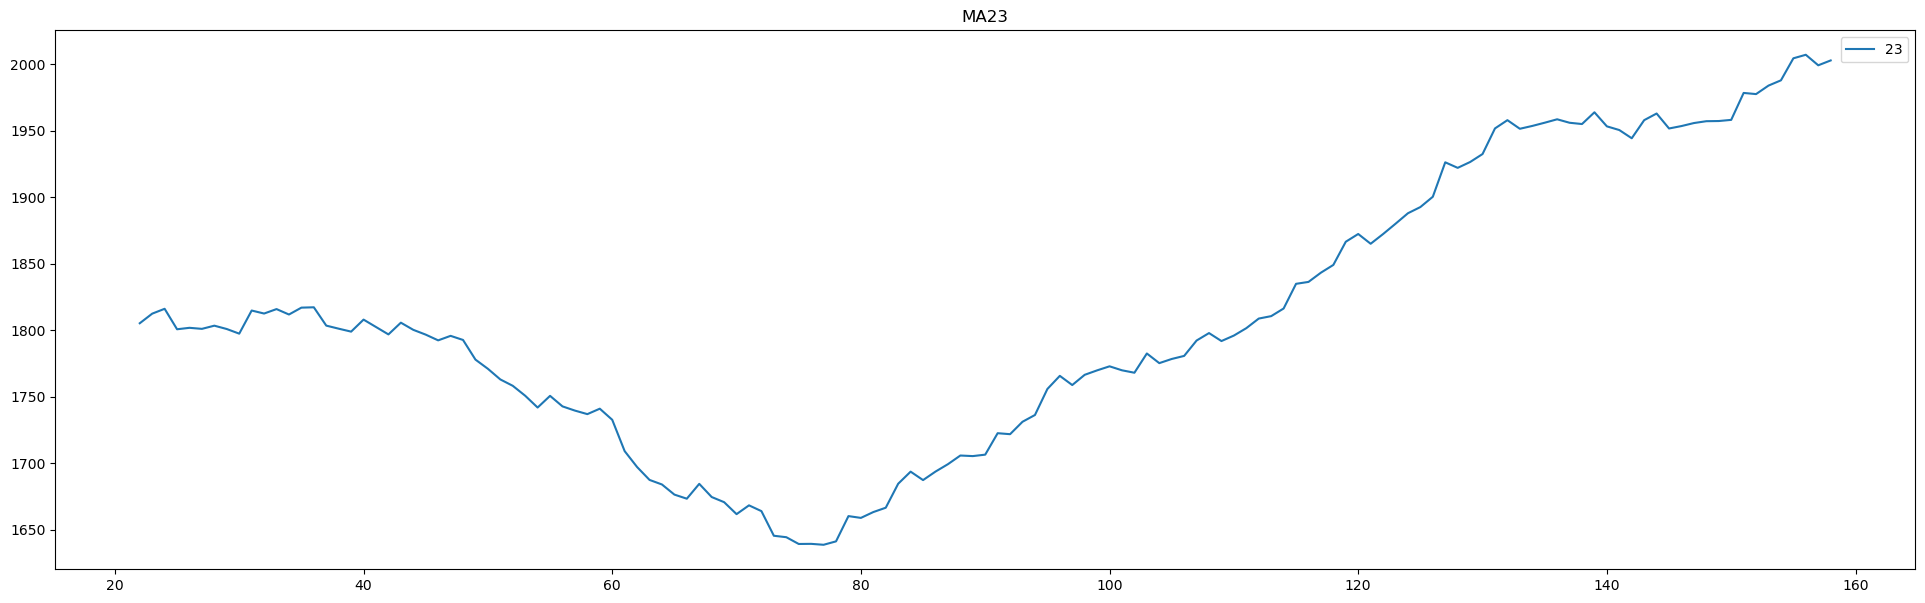

In [5]:
plt.figure(figsize=(24,7))
Walmart.Footfalls.plot(label="org")
for i in range(2,24):
    plt.figure(figsize=(24,7))
    Walmart["Footfalls"].rolling(i).mean().plot(label=str(i))
    plt.title("MA"+str(i))
    plt.legend(loc='best')
    plt.show()

# Time series decomposition plot 


<Figure size 2400x2000 with 0 Axes>

<Figure size 2400x2000 with 0 Axes>

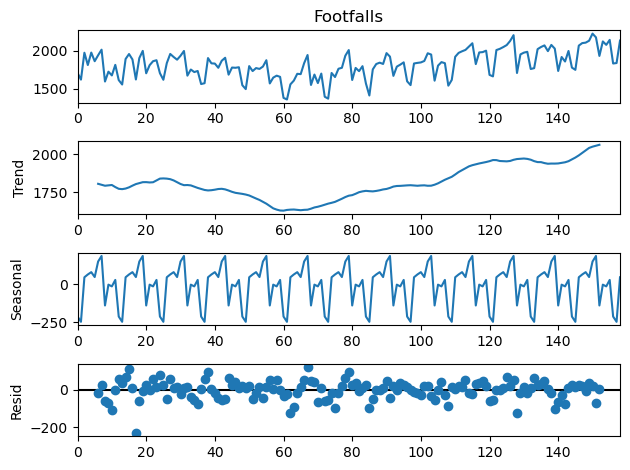

<Figure size 2400x2000 with 0 Axes>

In [34]:
plt.figure(figsize=(24,20))
decompose_ts_add = seasonal_decompose(Walmart.Footfalls,period= 12)
decompose_ts_add.plot()
plt.figure(figsize=(24,20))


# ACF plots and PACF plots


C:\Users\Iftekar\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


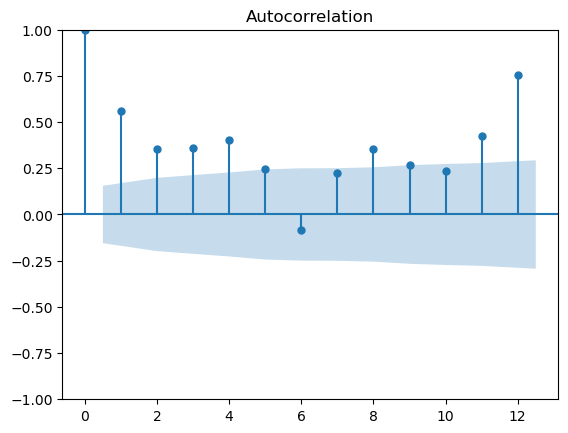

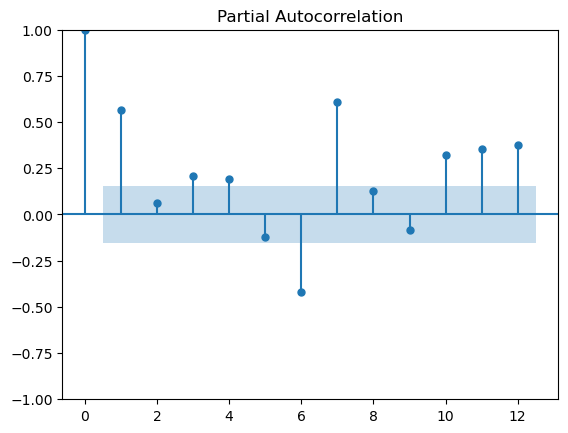

In [9]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(Walmart.Footfalls,lags=12)
tsa_plots.plot_pacf(Walmart.Footfalls,lags=12)
plt.show()


### Evaluation Metric MAPE

In [4]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

### Simple Exponential Method


In [6]:
ses_model = SimpleExpSmoothing(Train["Footfalls"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
print(MAPE(pred_ses,Test.Footfalls)) 
rmse = np.sqrt(np.mean((np.array(Test['Footfalls'])-np.array((pred_ses)))**2))
rmse

8.490637057828362


196.3338897477322

In [19]:
pred_ses

147    1913.677017
148    1913.677017
149    1913.677017
150    1913.677017
151    1913.677017
152    1913.677017
153    1913.677017
154    1913.677017
155    1913.677017
156    1913.677017
157    1913.677017
158    1913.677017
dtype: float64

In [20]:
Test['Footfalls']

147    2099
148    2105
149    2130
150    2223
151    2174
152    1931
153    2121
154    2076
155    2141
156    1832
157    1838
158    2132
Name: Footfalls, dtype: int64

### Holt method 

In [7]:
# Holt method 
hw_model = Holt(Train["Footfalls"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
print(MAPE(pred_hw,Test.Footfalls))
rmse = np.sqrt(np.mean((np.array(Test['Footfalls'])-np.array((pred_hw)))**2))
rmse



7.546249229496066


C:\Users\Iftekar\AppData\Local\Temp\ipykernel_10904\1302883202.py:2: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  hw_model = Holt(Train["Footfalls"]).fit(smoothing_level=0.8, smoothing_slope=0.2)


193.85064490751182

### Holts winter exponential smoothing with additive seasonality and additive trend


In [8]:
hwe_model_add_add = ExponentialSmoothing(Train["Footfalls"],seasonal="add",trend="add",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
print(MAPE(pred_hwe_add_add,Test.Footfalls))
rmse = np.sqrt(np.mean((np.array(Test['Footfalls'])-np.array((pred_hwe_add_add)))**2))
rmse

1.9154696806020324


45.07539939360432

### Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [9]:
hwe_model_mul_add = ExponentialSmoothing(Train["Footfalls"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
print(MAPE(pred_hwe_mul_add,Test.Footfalls))
rmse = np.sqrt(np.mean((np.array(Test['Footfalls'])-np.array((pred_hwe_add_add)))**2))
rmse

2.8569966488590386


45.07539939360432

## Final Model by combining train and test

In [16]:
#Forecasting for next 10 time periods
hwe_model_add_add.forecast(10)

147    2071.819854
148    2108.696788
149    2076.320841
150    2168.083334
151    2213.734301
152    1894.225789
153    2050.543414
154    2030.980476
155    2068.238649
156    1825.989119
dtype: float64

In [10]:
hwe_model_add_add.predict(147,157)

147    2071.819854
148    2108.696788
149    2076.320841
150    2168.083334
151    2213.734301
152    1894.225789
153    2050.543414
154    2030.980476
155    2068.238649
156    1825.989119
157    1799.385790
dtype: float64